In [2]:
import sys
import os
sys.path.append("/cluster/home/vogtva/pde-data-gen")
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

In [3]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from dotenv import load_dotenv
from pandas.plotting import parallel_coordinates
import importlib
import plotly.express as px
import os
import glob
import pandas as pd
import json

import src.db_tools as db_tools
from src.db_tools import (
    get_dataset,
    filter_df,
    filter_dataset,
    expand_json_column,
    make_animation,
    metrics_grid,
    plot_ball_behavior,
    plot_all_trajectories,
)
import src.classify as classify
from src.classify import classify_trajectories
importlib.reload(db_tools)
importlib.reload(classify);

In [4]:
model = "bruss"
ds_id = "blowup"
ds, output_dir = get_dataset(model, ds_id)
df = ds.df
df["ratio_b_a"] = df["B"] / df["A"]

In [6]:
df["A"].unique()

array([4.75], dtype=float32)

In [5]:
df["ratio_b_a"].unique()

array([5.0526314, 5.3486843, 5.644737 , 5.9407897, 6.236842 , 6.5328946,
       6.8289475, 7.125    ], dtype=float32)

In [19]:
# make a table of size df.dt.unique() x df.B.unique()
# where each entry is the number of nans in the corresponding trajectory

# get the number of nans in each trajectory
for i, row in df.iterrows():
    df.loc[i, "n_nans"] = np.isnan(np.array(ds.get_data(i))).sum()

# make the table
table = df.pivot_table(index="dt", columns="B", values="n_nans", aggfunc="mean")
table = table.fillna(0)

# for every B, get the largest dt that has no nans
max_dts = []
for col in table.columns:
    # print(table[col])
    max_dts.append(((table[col] > 0).iloc[::-1].idxmin()))

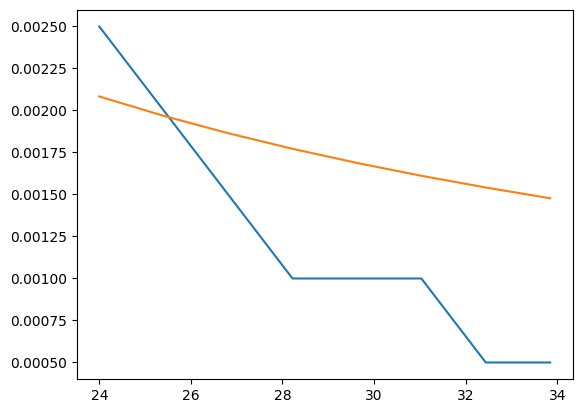

In [26]:
# plot B vs. max_dts
plt.plot(table.columns, max_dts)
plt.plot(table.columns, 0.05 / table.columns)

In [5]:
table

B,24.00000,25.40625,26.81250,28.21875,29.62500,31.03125,32.43750,33.84375
dt,,,,,,,,
0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.0010,0.0,0.0,0.0,0.0,0.0,0.0,3109600.0,3075800.0
0.0015,0.0,0.0,0.0,304200.0,3143400.0,3143400.0,3109600.0,3075800.0
0.0020,0.0,0.0,2906800.0,3143400.0,3143400.0,3109600.0,3109600.0,3075800.0
0.0025,0.0,3177200.0,3177200.0,3143400.0,3143400.0,3143400.0,3109600.0,3075800.0


In [16]:
df_sub = df[df.B == 24]

In [17]:
# for i, row in df_sub.iterrows():
#     make_animation(ds.get_data(row.idx), f"{row["dt"]:.5f} "out/blowup/")

In [18]:
plot_all_trajectories(filter_dataset(ds, df_sub), metric="dev", label_column="dt")